![logo](https://github.com/heberrossi/Curso_CientistaDeDados_EBAC_Exercicios/blob/main/logo/ebac_logo-data_science.png?raw=true)


# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista.

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [2]:
df.set_index('Data Emissão', inplace=True)
df_2020 = df.loc['2020-01-01':]
df_2020

,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
Data Emissão,,,,,,,,,,,,
2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
2021-01-07,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
2021-01-07,61.585.865/0240-93,RAIADROGASIL S/A,190447,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia


In [3]:
# Criando DF com proporção média de retorno por categoria através do groupby
proporcao_cat = df_2020.groupby('categoria')['Retorno'].apply(lambda x: (x > 0).mean()).reset_index()

# Determinando colunas
proporcao_cat.columns = ['Categoria', 'Proporcao_Retorno_Maior_Que_0']

# Ordenando
proporcao_cat.sort_values(by='Proporcao_Retorno_Maior_Que_0', ascending=False, inplace=True)

# Resetando Index
proporcao_cat.reset_index(drop=True, inplace=True)
proporcao_cat

,Categoria,Proporcao_Retorno_Maior_Que_0
0,Restaurantes,0.746214
1,Alimentos,0.681584
2,Mercado,0.478155
3,Construção,0.468810
4,não definido,0.363394
5,Farmácia,0.351556
6,Auto posto,0.250000
7,Vestuário,0.230729
8,Varejo,0.138373


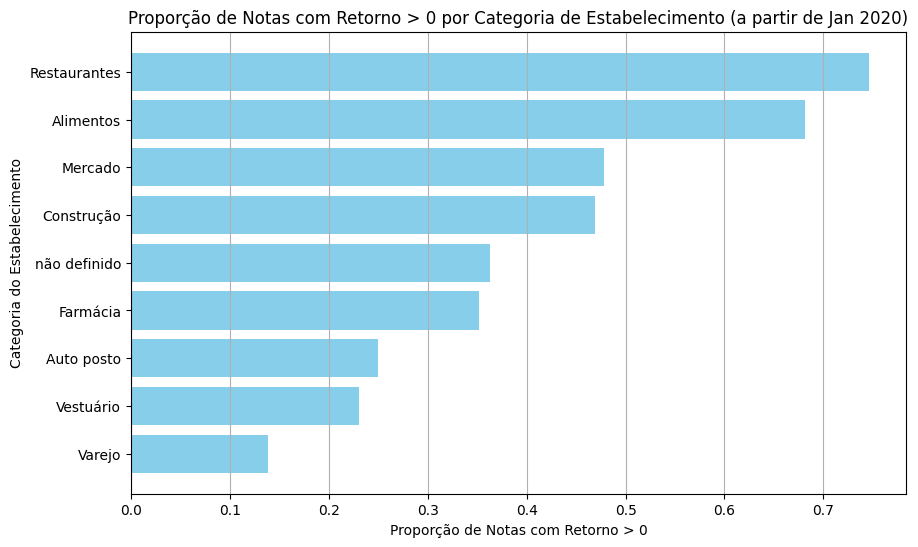

(      Categoria  Proporcao_Retorno_Maior_Que_0
 0  Restaurantes                       0.746214
 1     Alimentos                       0.681584
 2       Mercado                       0.478155
 3    Construção                       0.468810
 4  não definido                       0.363394
 5      Farmácia                       0.351556
 6    Auto posto                       0.250000
 7     Vestuário                       0.230729
 8        Varejo                       0.138373,
 None)

In [4]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(proporcao_cat['Categoria'], proporcao_cat['Proporcao_Retorno_Maior_Que_0'], color='skyblue')
plt.xlabel('Proporção de Notas com Retorno > 0')
plt.ylabel('Categoria do Estabelecimento')
plt.title('Proporção de Notas com Retorno > 0 por Categoria de Estabelecimento (a partir de Jan 2020)')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Mostrar a tabela e o gráfico
proporcao_cat, plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [5]:
# Criando uma tabela cruzando categoria com flag_crédito
tab = pd.crosstab(df_2020.categoria, df_2020.flag_credito, margins=True, margins_name='total')
tab

flag_credito,0,1,total
categoria,,,
Alimentos,1608,3442,5050
Auto posto,405,135,540
Construção,8524,7523,16047
Farmácia,6607,3582,10189
Mercado,14381,13177,27558
Restaurantes,553,1626,2179
Varejo,4365,701,5066
Vestuário,1477,443,1920
não definido,11718,6689,18407


In [6]:
# Calculando probabilidade de evento e não evento. No caso, se o Retorno > 0
tab['pct_nao_evento'] = tab[0]/tab.loc['total',0]
tab['pct_evento']     = tab[1]/tab.loc['total',1]

# Calculando WOE e RC
tab['RC'] = tab['pct_evento']/tab['pct_nao_evento']
tab['WOE'] = np.log(tab['pct_evento']/tab['pct_nao_evento'])
tab


flag_credito,0,1,total,pct_nao_evento,pct_evento,RC,WOE
categoria,,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,2.847218,1.046342
Auto posto,405,135,540,0.008159,0.003618,0.443379,-0.813331
Construção,8524,7523,16047,0.171723,0.201592,1.173934,0.160360
Farmácia,6607,3582,10189,0.133104,0.095986,0.721136,-0.326928
Mercado,14381,13177,27558,0.289718,0.353100,1.218775,0.197846
Restaurantes,553,1626,2179,0.011141,0.043571,3.911032,1.363801
Varejo,4365,701,5066,0.087937,0.018785,0.213614,-1.543585
Vestuário,1477,443,1920,0.029755,0.011871,0.398951,-0.918918
não definido,11718,6689,18407,0.236069,0.179243,0.759283,-0.275381


In [8]:
tab_ = tab.drop(index='total')
tab_.reset_index(inplace=True)
tab_.columns.name = None  # Remove o nome das colunas do índice
tab_.index.name = None    # Remove o nome do índice das linhas
tab_woe = tab_[['categoria','WOE']]
tab_woe.sort_values(by='WOE', ascending=False, inplace=True)
tab_woe.reset_index(drop=True, inplace=True)
tab_woe

<ipython-input-8-25f0fdeb5b3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_woe.sort_values(by='WOE', ascending=False, inplace=True)


,categoria,WOE
0,Restaurantes,1.363801
1,Alimentos,1.046342
2,Mercado,0.197846
3,Construção,0.160360
4,não definido,-0.275381
5,Farmácia,-0.326928
6,Auto posto,-0.813331
7,Vestuário,-0.918918
8,Varejo,-1.543585


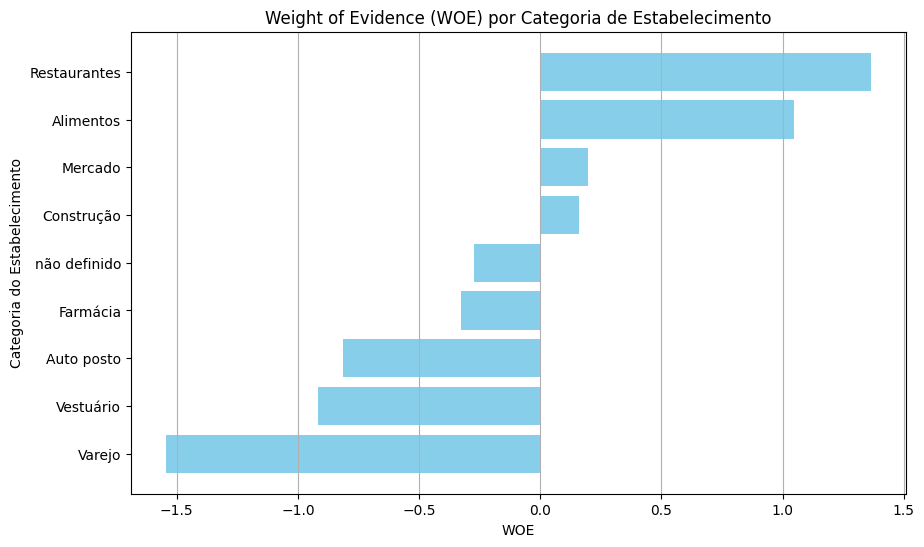

In [9]:
# Plotar o gráfico de WOE por categoria
plt.figure(figsize=(10, 6))
plt.barh(tab_woe['categoria'], tab_woe['WOE'], color='skyblue')
plt.xlabel('WOE')
plt.ylabel('Categoria do Estabelecimento')
plt.title('Weight of Evidence (WOE) por Categoria de Estabelecimento')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

Através dos valores de WOE obtidos, podemos concluir que Restaurantes possuem maior taxa de evento do que não evento, isso significa que os valores dos créditos tem maior probabilidade de serem positivos, ou seja, as doações são maiores que o valor da nota.
Também concluímos, seguindo a lógica inversa, que varejo possui mais probabilidade de não evento do que evento, o que significa que possui menos chance o valor dos créditos serem maiores que 0, onde nesse gráfico está negativo.

Se observarmos esse gráfico com o gráfico de proporção de Retorno > 0 feito anteriormente, podemos observar total congruência entre eles pela ordem das categorias, da maior pra menor

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [12]:
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.WOE
tab

flag_credito,0,1,total,pct_nao_evento,pct_evento,RC,WOE,iv_parcial
categoria,,,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,2.847218,1.046342,0.062613
Auto posto,405,135,540,0.008159,0.003618,0.443379,-0.813331,0.003694
Construção,8524,7523,16047,0.171723,0.201592,1.173934,0.160360,0.004790
Farmácia,6607,3582,10189,0.133104,0.095986,0.721136,-0.326928,0.012135
Mercado,14381,13177,27558,0.289718,0.353100,1.218775,0.197846,0.012540
Restaurantes,553,1626,2179,0.011141,0.043571,3.911032,1.363801,0.044229
Varejo,4365,701,5066,0.087937,0.018785,0.213614,-1.543585,0.106742
Vestuário,1477,443,1920,0.029755,0.011871,0.398951,-0.918918,0.016434
não definido,11718,6689,18407,0.236069,0.179243,0.759283,-0.275381,0.015649


In [14]:
tab_2 = tab.drop(index='total')
tab_2.reset_index(inplace=True)
tab_2.columns.name = None  # Remove o nome das colunas do índice
tab_2.index.name = None    # Remove o nome do índice das linhas
tab_IV = tab_2[['categoria','iv_parcial']]
tab_IV.sort_values(by='iv_parcial', ascending=False, inplace=True)
tab_IV.reset_index(drop=True, inplace=True)
tab_IV

<ipython-input-14-329a0678ed45>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_IV.sort_values(by='iv_parcial', ascending=False, inplace=True)


,categoria,iv_parcial
0,Varejo,0.106742
1,Alimentos,0.062613
2,Restaurantes,0.044229
3,Vestuário,0.016434
4,não definido,0.015649
5,Mercado,0.012540
6,Farmácia,0.012135
7,Construção,0.004790
8,Auto posto,0.003694


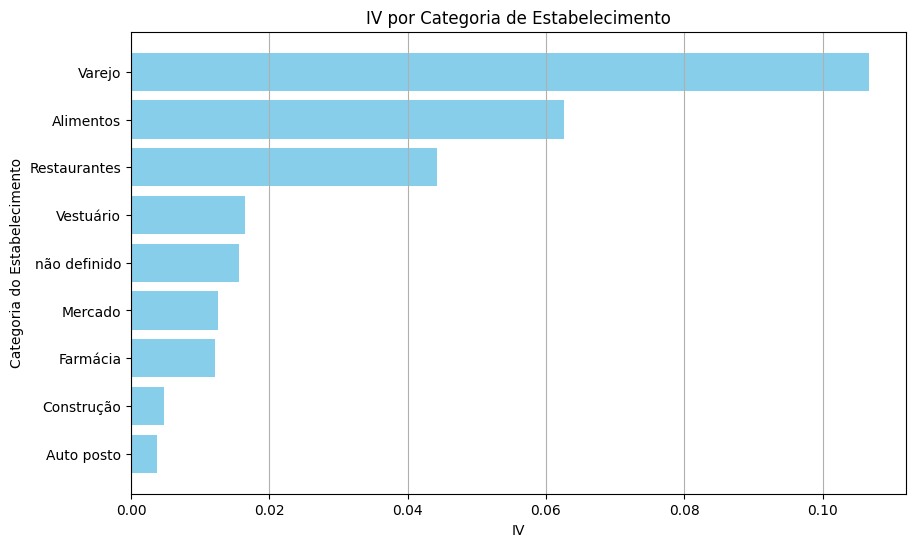

In [16]:
# Plotar o gráfico de WOE por categoria
plt.figure(figsize=(10, 6))
plt.barh(tab_IV['categoria'], tab_IV['iv_parcial'], color='skyblue')
plt.xlabel('IV')
plt.ylabel('Categoria do Estabelecimento')
plt.title('IV por Categoria de Estabelecimento')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Mostrar o gráfico
plt.show()

Pelo gráfico de IV, observamos que Auto posto, Construção, Farmácia, Mercado e Vestuário não são úteis para predição, Restaurantes são fortes para predição, e Alimentos e Varejo possuem previsibilidade suspeita, podendo indicar overfitting

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.
